# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Wisnu Anugrah Pratama
- Email: wisnuanugrahpratama@gmail.com
- Id Dicoding: wisnuap1993 (https://www.dicoding.com/users/wisnuap1993/academies)

## Pertanyaan Bisnis

Dataset yang dipilih pada proyek ini adalah [Bike Sharing Dataset](https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ) [(Sumber)](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) yang merupakan dataset yang merekam proses penyewaan sepeda di tahun 2011 & 2012. Oleh karena itu, akan dirumuskan dua pertanyaan bisnis terkait, yaitu:
- Jenis pelanggan dengan sewa terbanyak?
- Kapan waktu paling banyak dilakukan penyewaan sepeda?
- Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?

## Data Wrangling

### Tahap Persiapan
Pada tahap ini akan dilakukan instalasi seluruh library yang dibutuhkan dalam seluruh proses analisis data.


Pertama, instalasi library untuk unduh & import dataset dari Google Drive

In [1]:
!pip install gdown
!pip install --upgrade gdown
import gdown
import zipfile

Selanjutnya, instalasi library untuk keperluan analisis dan visualisasi data, serta tambahan library pendukung untuk mengabaikan warning

In [2]:
# Instalasi library untuk Data Analysis
import pandas as pd
import numpy as np

# Instalasi library untuk Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk mengabaikan warning
import warnings
warnings.filterwarnings("ignore")

### Gathering Data
Pada tahap ini akan dilakukan unduh dan import dataset yang akan dianalisis ke dalam Notebook. Dataset yang dipilih adalah [Bike Sharing Dataset](https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ) [(Sumber)](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) yang terdiri dari dua file csv, yaitu "hour.csv" dan "day.csv". Pada analisis ini akan dipakai dataset "hour.csv" dikarenakan memiliki data parameter waktu lebih lengkap hingga jam.

Berikut adalah penjelasan dari masing-masing kolom:

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (source: http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Pertama, dilakukan unduh dan ekstraksi dataset dari Google Drive

In [3]:
url = "https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ"
output = "Bike-sharing-dataset.zip"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100%|██████████| 280k/280k [00:00<00:00, 36.8MB/s]


'Bike-sharing-dataset.zip'

In [4]:
zip_ref = zipfile.ZipFile("/content/Bike-sharing-dataset.zip")
zip_ref.extractall("/content/")
zip_ref.close()

Selanjutnya, membuat dataframe dan melihat 10 baris pertama dari dataset "day.csv" dan "hour.csv". Sebagai catatan, pada tahap-tahap selanjutnya, dataset yang dipakai adalah dataset "hour.csv".

In [5]:
day_df = pd.read_csv('/content/day.csv')
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data
Pada tahap ini akan dilakukan asesmen terhadap data pada Tabel Hour (hour_df) sebagai berikut:
- Informasi data, mulai dari nama & jumlah kolom, jumlah record, dan jenis data
- Duplikasi data untuk mengecek adanya record data yang duplikat sehingga nanti akan mempengaruhi hasil analisis
- Missing data untuk mengecek adanya missing value dari sisi jumlah dan persentase keseluruhan, baik itu null, nilai kosong, dan nan

Pertama, akan dibuat fungsi pendukung untuk menampilkan informasi missing value pada suatu dataframe

In [7]:
# Function to display information about missing value
def show_null(df):
    """
    Return the total missing values and the percentage of
    missing values by column.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN') | (df == np.NaN)).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    return pd.DataFrame({'num_missing': null_count,
                         'missing_percentage': null_percentage,
                         'num_empty': empty_count,
                         'empty_percentage': empty_percentage,
                         'nan_count': nan_count,
                         'nan_percentage': nan_percentage})

Selanjutnya, dilakukan asesmen data berupa informasi data, duplikasi data, dan missing data

In [8]:
# Informasi data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Mengecek data duplikat
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


In [10]:
# Mengecek missing data
show_null(hour_df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
instant,0,0.0,0,0.0,0,0.0
dteday,0,0.0,0,0.0,0,0.0
season,0,0.0,0,0.0,0,0.0
yr,0,0.0,0,0.0,0,0.0
mnth,0,0.0,0,0.0,0,0.0
hr,0,0.0,0,0.0,0,0.0
holiday,0,0.0,0,0.0,0,0.0
weekday,0,0.0,0,0.0,0,0.0
workingday,0,0.0,0,0.0,0,0.0
weathersit,0,0.0,0,0.0,0,0.0


### Cleaning Data
Pada tahap ini akan dilakukan penanganan terhadap temuan hasil asesmen data pada tahap sebelumnya, sebagai berikut:
- Penghapusan kolom "instant" karena tidak akan dipakai dalam analisis
- Penggantian nama kolom untuk mempermudah pemahaman terkait isi kolom
- Konversi nilai, dimana pada kolom bertipe numerik yang telah dinormalisasi menjadi nilai sebenarnya dan beberapa kolom kategori sesuai dengan kategori asalnya untuk memberikan gambaran data secara utuh.
- Hasil asesmen menunjukkan tidak adanya temuan missing value dan data duplikat, namun ditemukan adanya ketidaksesuaian jenis data. Oleh karena itu, akan dilakukan pengubahan tipe data untuk data berjenis "datetime" dan "category".

In [11]:
# Penghapusan kolom "instant"
hour_df.drop('instant', axis=1, inplace=True)

# Penggantian nama kolom
hour_df.rename(columns={'dteday':'date','yr':'year','mnth':'month','hr':'hour',
                        'holiday':'is_holiday','workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity',
                        'cnt':'total_users'},inplace=True)
hour_df.head()

,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_users
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# Konversi nilai kategoris
hour_df["year"] = np.where(hour_df["year"] == 0, 2011, 2012)
hour_df["is_holiday"] = np.where(hour_df["is_holiday"] == 1, "yes", "no")
hour_df["is_workingday"] = np.where(hour_df["is_workingday"] == 1, "yes", "no")

season_cond = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
hour_df["season"] = hour_df["season"].replace(season_cond)

weekday_cond = {0:"sunday", 1:"monday", 2:"tuesday", 3:"wednesday",
                4:"thursday", 5:"friday", 6:"saturday"}
hour_df["weekday"] = hour_df["weekday"].replace(weekday_cond)

# Konversi nilai numerik
hour_df["temp"]      = hour_df["temp"]*41
hour_df["atemp"]     = hour_df["atemp"]*50
hour_df["humidity"]  = hour_df["humidity"]*100
hour_df["windspeed"] = hour_df["windspeed"]*67

hour_df.head(10)

,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_users
0,2011-01-01,spring,2011,1,0,no,saturday,no,1,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01,spring,2011,1,1,no,saturday,no,1,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01,spring,2011,1,2,no,saturday,no,1,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01,spring,2011,1,3,no,saturday,no,1,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01,spring,2011,1,4,no,saturday,no,1,9.84,14.395,75.0,0.0000,0,1,1
5,2011-01-01,spring,2011,1,5,no,saturday,no,2,9.84,12.880,75.0,6.0032,0,1,1
6,2011-01-01,spring,2011,1,6,no,saturday,no,1,9.02,13.635,80.0,0.0000,2,0,2
7,2011-01-01,spring,2011,1,7,no,saturday,no,1,8.20,12.880,86.0,0.0000,1,2,3
8,2011-01-01,spring,2011,1,8,no,saturday,no,1,9.84,14.395,75.0,0.0000,1,7,8
9,2011-01-01,spring,2011,1,9,no,saturday,no,1,13.12,17.425,76.0,0.0000,8,6,14


In [13]:
# Pengubahan tipe data
hour_df['date']               = pd.to_datetime(hour_df.date)
hour_df['season']             = hour_df.season.astype('category')
hour_df['year']               = hour_df.year.astype('category')
hour_df['month']              = hour_df.month.astype('category')
hour_df['hour']               = hour_df.hour.astype('category')
hour_df['is_holiday']         = hour_df.is_holiday.astype('category')
hour_df['weekday']            = hour_df.weekday.astype('category')
hour_df['is_workingday']      = hour_df.is_workingday.astype('category')
hour_df['weather_condition']  = hour_df.weather_condition.astype('category')

# Pengecekan informasi data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               17379 non-null  datetime64[ns]
 1   season             17379 non-null  category      
 2   year               17379 non-null  category      
 3   month              17379 non-null  category      
 4   hour               17379 non-null  category      
 5   is_holiday         17379 non-null  category      
 6   weekday            17379 non-null  category      
 7   is_workingday      17379 non-null  category      
 8   weather_condition  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

## Exploratory Data Analysis (EDA)
Pada tahap ini akan dilakukan eksplorasi & analisis terhadap beberapa parameter dataset untuk mendapatkan informasi untuk menjawab pertanyaan bisnis yang sudah disusun di awal, berupa eksplorasi statistik data dan demografi dilihat dari beberapa parameter

### Rangkuman parameter statistik

In [14]:
hour_df.describe(include="all")

,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_users
count,17379,17379,17379.0,17379.0,17379.0,17379,17379,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,2.0,12.0,24.0,2,7,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,fall,2012.0,5.0,17.0,no,saturday,yes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,8734.0,1488.0,730.0,16879,2512,11865,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000


### Demografi Pelanggan

In [15]:
# Demografi pelanggan berdasarkan tahun (year) & musim (season)
hour_df.groupby(by=["year", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_users": "sum"
})

casual  registered  total_users
year season                                 
2011 fall     95450      324200       419650
     spring   21425      128575       150000
     summer   77564      269752       347316
     winter   52813      273324       326137
2012 fall    130641      510838       641479
     spring   39197      282151       321348
     summer  125958      445315       571273
     winter   76969      438507       515476

In [16]:
# Demografi pelanggan berdasarkan hari liburan (is_holiday) dan hari kerja (is_workingday)
hd = hour_df.groupby(by="is_holiday").agg({"casual": "sum",
                                          "registered": "sum",
                                          "total_users": "sum"})
display(hd)
print("\n=========================================================\n")

hk = hour_df.groupby(by="is_workingday").agg({"casual": "sum",
                                             "registered": "sum",
                                             "total_users": "sum"})

display(hk)

,casual,registered,total_users
is_holiday,,,
no,597658,2616586,3214244
yes,22359,56076,78435


,casual,registered,total_users
is_workingday,,,
no,316732,683537,1000269
yes,303285,1989125,2292410


In [17]:
# Demografi pelanggan berdasarkan kondisi cuaca
hour_df.groupby(by="weather_condition").agg({
    "casual": "sum",
    "registered": "sum",
    "total_users": "sum",
    "temp":["max", "mean", "min"],
    "humidity":["max", "mean", "min"],
    "windspeed":["max", "mean", "min"]
})

casual registered total_users   temp                   \
                      sum        sum         sum    max       mean   min   
weather_condition                                                          
1                  462745    1875428     2338173  41.00  20.953217  0.82   
2                  134481     661471      795952  39.36  19.452262  0.82   
3                   22783     135548      158331  37.72  18.724200  3.28   
4                       8        215         223   9.02   7.653333  5.74   

                  humidity                  windspeed                     
                       max       mean   min       max       mean     min  
weather_condition                                                         
1                    100.0  57.374660   8.0   54.0020  12.767059  0.0000  
2                    100.0  69.880722   0.0   47.9988  12.058220  0.0000  
3                    100.0  82.763214   0.0   56.9969  14.661253  0.0000  
4                     93.0  88.333333  86.0   22.0028  13.668000  6.0032

In [18]:
## Demografi pelanggan berdasarkan jam (hour)
hour_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "total_users": "sum",
    "temp":["max", "mean", "min"],
    "humidity":["max", "mean", "min"],
    "windspeed":["max", "mean", "min"]
})

casual registered total_users   temp                  humidity  \
        sum        sum         sum    max       mean   min      max   
hour                                                                  
0      7375      31755       39130  33.62  19.163829  1.64    100.0   
1      4709      19455       24164  33.62  18.833950  1.64    100.0   
2      3412      12940       16352  33.62  18.637510  0.82    100.0   
3      1893       6281        8174  32.80  18.577647  0.82    100.0   
4       874       3554        4428  31.98  18.311765  0.82    100.0   
5      1012      13249       14261  31.98  17.881032  0.82    100.0   
6      3017      52115       55132  32.80  17.731228  0.82    100.0   
7      8037     146134      154171  32.80  18.002779  0.82    100.0   
8     15761     245240      261001  34.44  18.654718  0.82    100.0   
9     22458     136980      159438  35.26  19.545777  1.64    100.0   
10    33789      92468      126257  37.72  20.523686  1.64    100.0   
11    43286     108034      151320  38.54  21.427153  2.46    100.0   
12    49718     134696      184414  39.36  22.151264  2.46    100.0   
13    52713     132206      184919  39.36  22.744033  3.28    100.0   
14    55089     120563      175652  39.36  23.168093  4.10    100.0   
15    54606     128543      183149  39.36  23.313196  4.92    100.0   
16    53834     173914      227748  41.00  23.163315  4.92    100.0   
17    54220     282640      336860  40.18  22.737589  4.92    100.0   
18    44496     265276      309772  39.36  22.188434  3.28    100.0   
19    35505     191284      226789  37.72  21.491209  3.28    100.0   
20    26378     138172      164550  37.72  20.852555  2.46    100.0   
21    20570     104875      125445  36.08  20.307390  2.46    100.0   
22    16200      79412       95612  34.44  19.864725  2.46    100.0   
23    11065      52876       63941  34.44  19.476126  1.64    100.0   

                      windspeed                  
           mean   min       max       mean  min  
hour                                             
0     69.101928   0.0   39.0007  10.837813  0.0  
1     70.421271   0.0   51.9987  10.630161  0.0  
2     71.682517   0.0   46.0022  10.352793  0.0  
3     72.978479  14.0   46.0022  10.112251  0.0  
4     74.236729  15.0   47.9988  10.439456  0.0  
5     74.292887   0.0   36.9974  10.072941  0.0  
6     74.417931   0.0   39.0007  10.567369  0.0  
7     73.090784   0.0   35.0008  10.982360  0.0  
8     70.268226   0.0   40.9973  11.829702  0.0  
9     66.169188   0.0   43.9989  12.814575  0.0  
10    61.606602   0.0   43.0006  13.536737  0.0  
11    57.143054   0.0   43.0006  13.891717  0.0  
12    53.670330   0.0   47.9988  14.472856  0.0  
13    51.159122   0.0   46.0022  14.849406  0.0  
14    49.698217   0.0   43.9989  15.574982  0.0  
15    49.212620   0.0   54.0020  15.754577  0.0  
16    49.579452   0.0   43.0006  15.900238  0.0  
17    51.343836   0.0   56.9969  15.635863  0.0  
18    53.598901   0.0   56.9969  15.053796  0.0  
19    57.244505   0.0   43.0006  14.079894  0.0  
20    60.146978   0.0   43.0006  13.079891  0.0  
21    63.153846   0.0   54.0020  12.118349  0.0  
22    65.314560   0.0   43.9989  11.700906  0.0  
23    67.326923   0.0   46.0022  11.041747  0.0

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jenis pelanggan dengan sewa terbanyak?

Untuk menjawab pertanyaan ini, akan dicek jumlah pelanggan dari dua jenis, yaitu Casual (Pelanggan tidak tetap dan tidak memiliki membership) & Registered (Pelanggan yang sudah terdaftar memiliki membership), baik itu dari jumlah tahunan, musiman, bulanan, dan harian. Untuk memvisualisasikan perbandingan antar dua jenis pelanggan ini, akan digunakan Bar Chart.

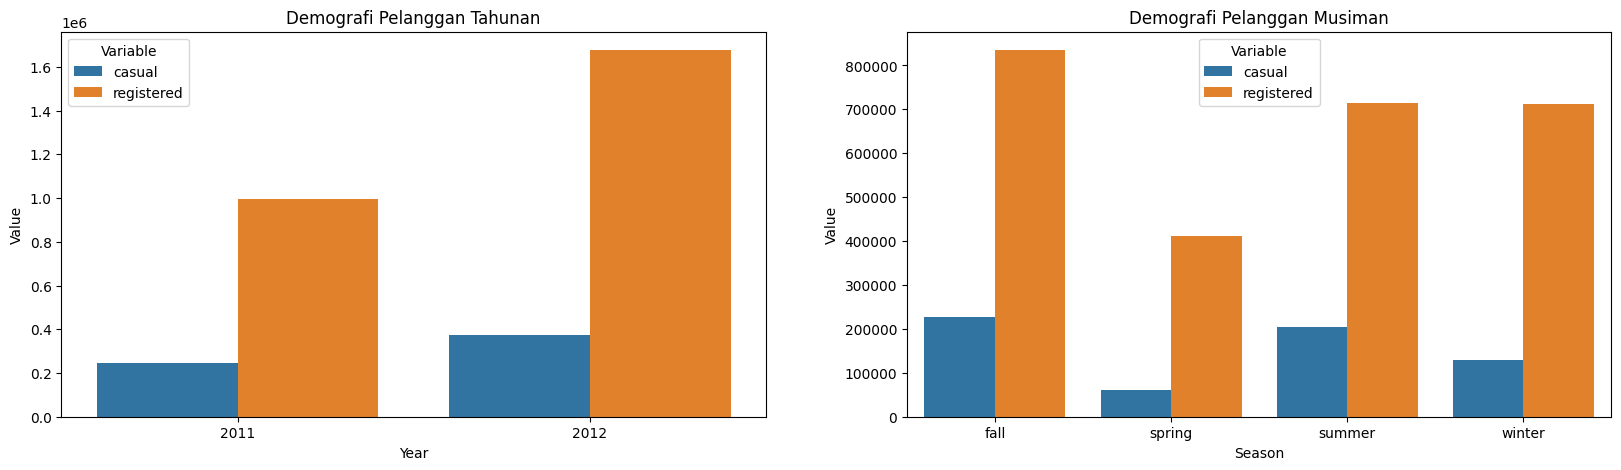

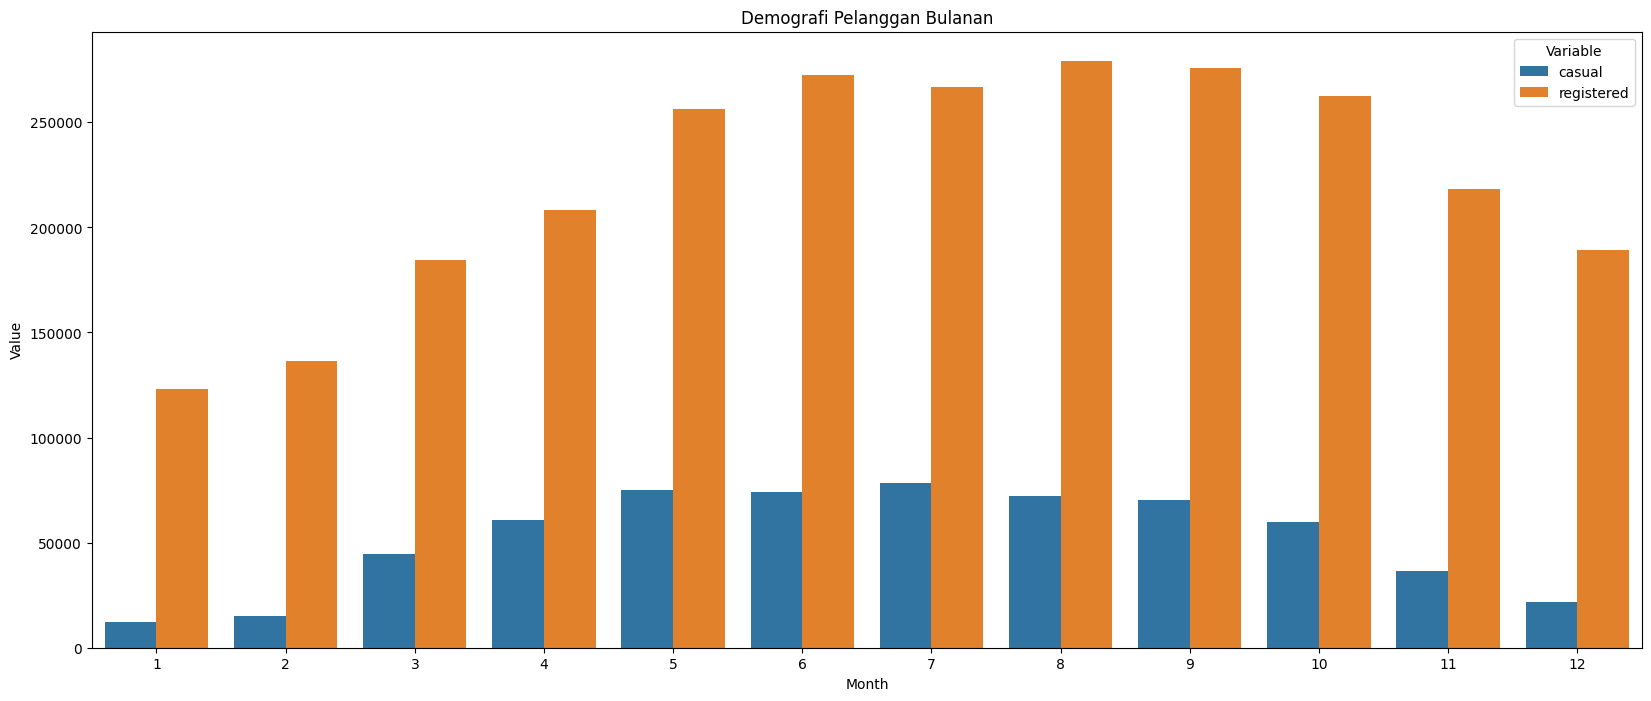

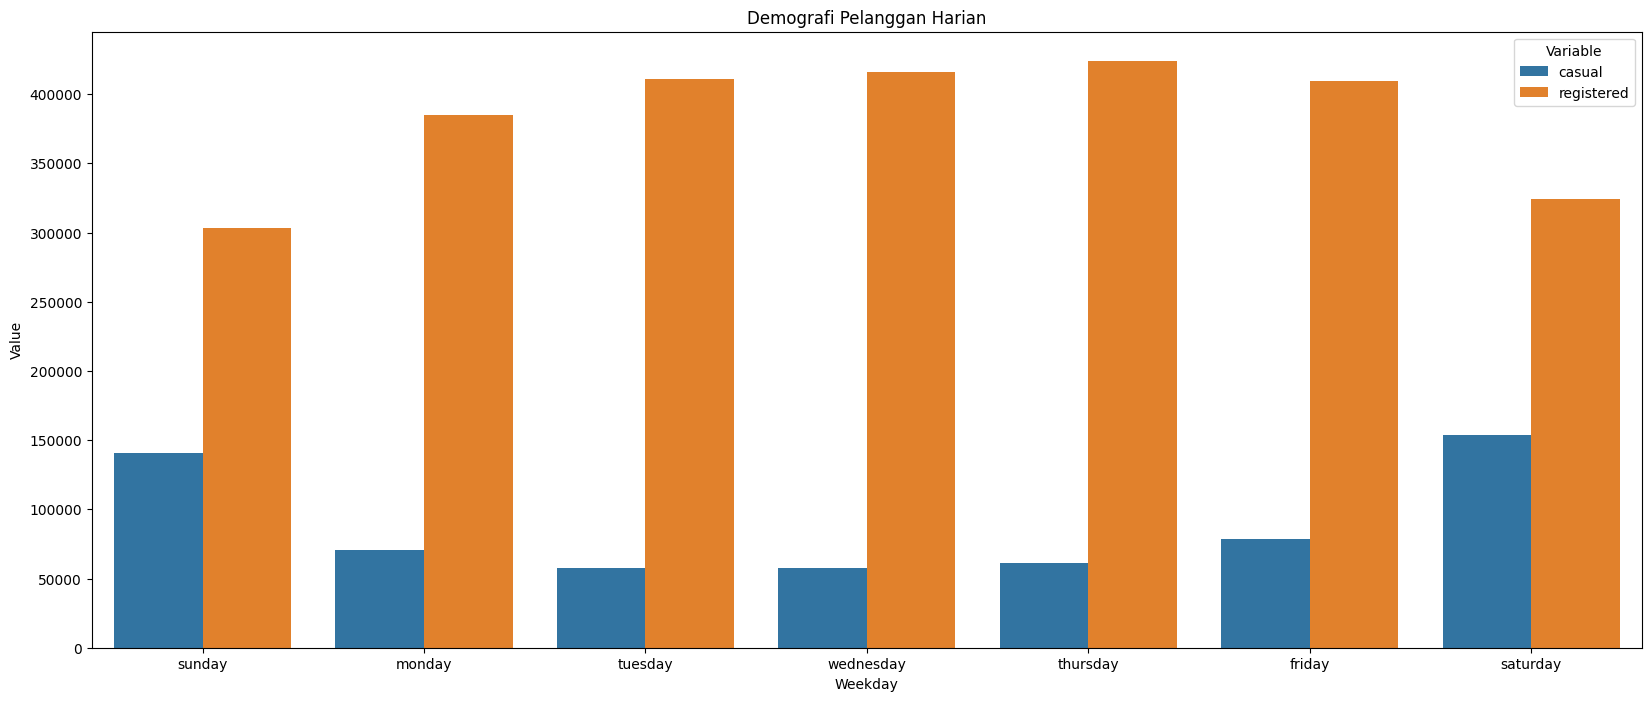

In [19]:
# Membuat dataframe visualisasi
df = hour_df[["year", "season", "month", "weekday", "casual", "registered"]]
tidy = df.melt(id_vars=["year", "season", "month", "weekday"]).rename(columns=str.title)

# Membuat Bar Chart jumlah pelanggan berdasarkan tahun & musim
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(20,5))
sns.barplot(x="Year", y="Value", hue="Variable", data=tidy,
            estimator="sum", errorbar=None, ax=ax1)
ax1.set_title("Demografi Pelanggan Tahunan")
sns.barplot(x="Season", y="Value", hue="Variable", data=tidy,
            estimator="sum", errorbar=None, ax=ax2)
ax2.set_title("Demografi Pelanggan Musiman")
plt.show()

# Membuat Bar Chart jumlah pelanggan berdasarkan bulan
fig,ax3=plt.subplots(figsize=(20,8))
sns.barplot(x="Month", y="Value", hue="Variable", data=tidy,
            estimator="sum", errorbar=None, ax=ax3)
ax3.set_title("Demografi Pelanggan Bulanan")
plt.show()

# Membuat Bar Chart jumlah pelanggan berdasarkan hari
fig,ax4=plt.subplots(figsize=(20,8))
order = ["sunday", "monday", "tuesday", "wednesday",
         "thursday", "friday", "saturday"]
sns.barplot(x="Weekday", y="Value", hue="Variable", data=tidy,
            estimator="sum", errorbar=None, order=order, ax=ax4)
ax4.set_title("Demografi Pelanggan Harian")
plt.show()

Berdasarkan hasil visualisasi di atas, baik itu tahunan, musiman, bulanan, dan harian, pelanggan Registered memiliki jumlah lebih banyak dibandingkan Casual. Sehingga ini dapat menjadi masukan bagi penyedia layanan sebagai fokus target marketing utama di periode berikutnya dan dapat mempromosikan tentang benefit menjadi pelanggan Registered.

### Pertanyaan 2: Kapan waktu paling banyak dilakukan penyewaan sepeda?

Untuk menjawab pertanyaan ini, akan dicek waktu optimum dimana banyak pelanggan yang melakukan penyewaan sepeda dengan cakupan musim, bulan, jam, dan jenis hari (hari libur atau hari kerja). Untuk memvisualisasikan masing-masing kebutuhan, akan digunakan Bar Chart & Line Chart.

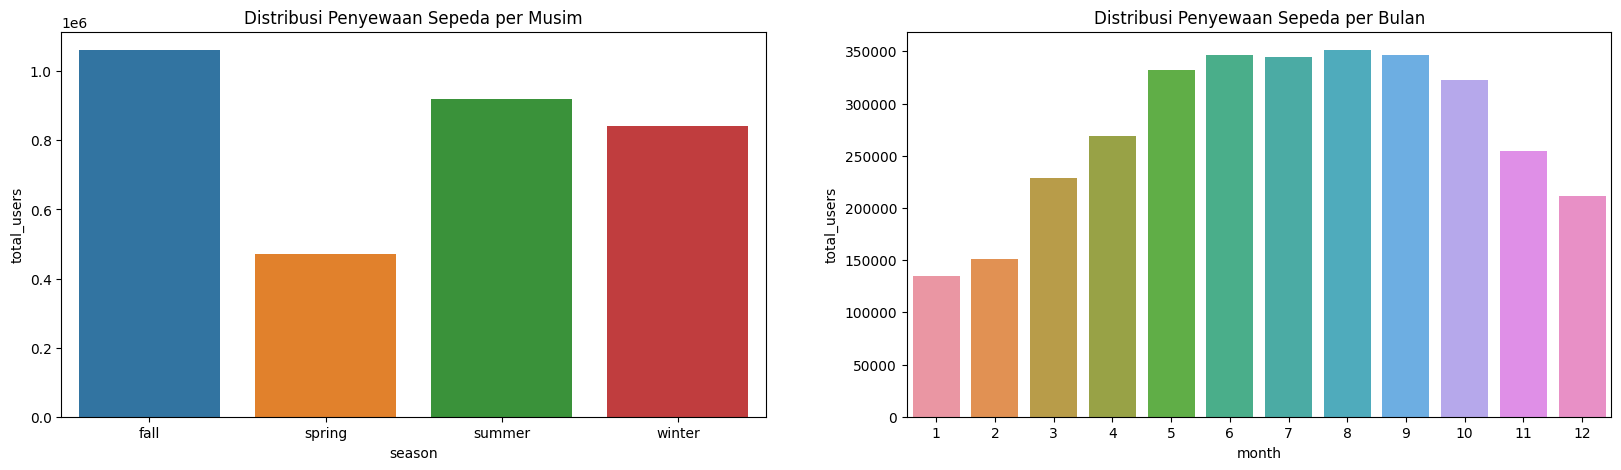

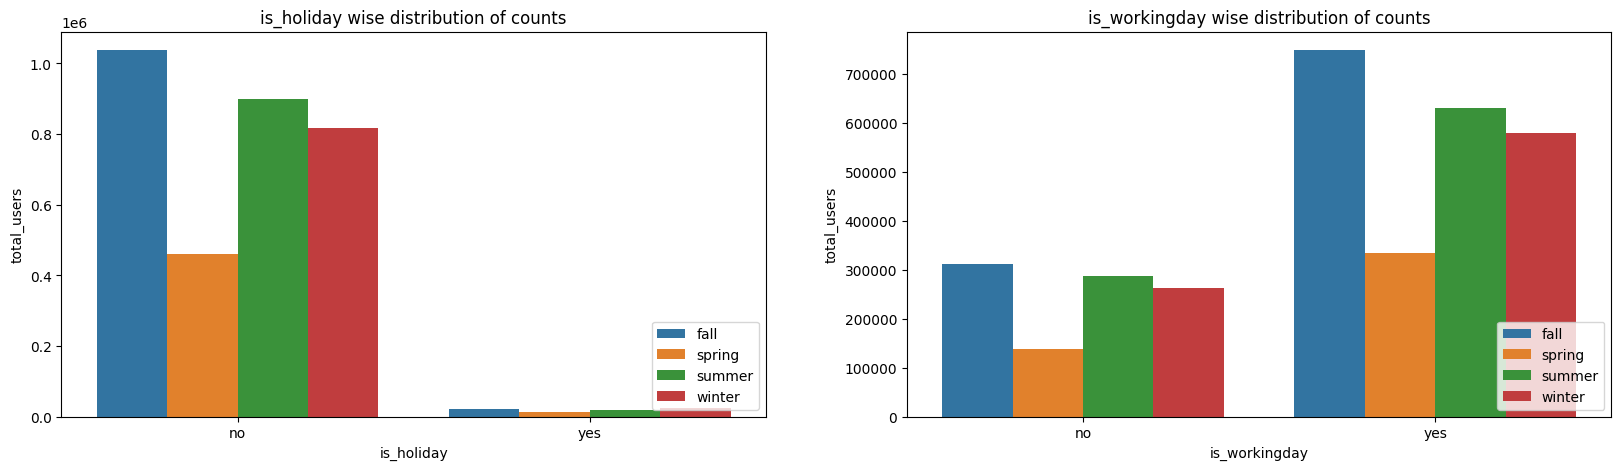

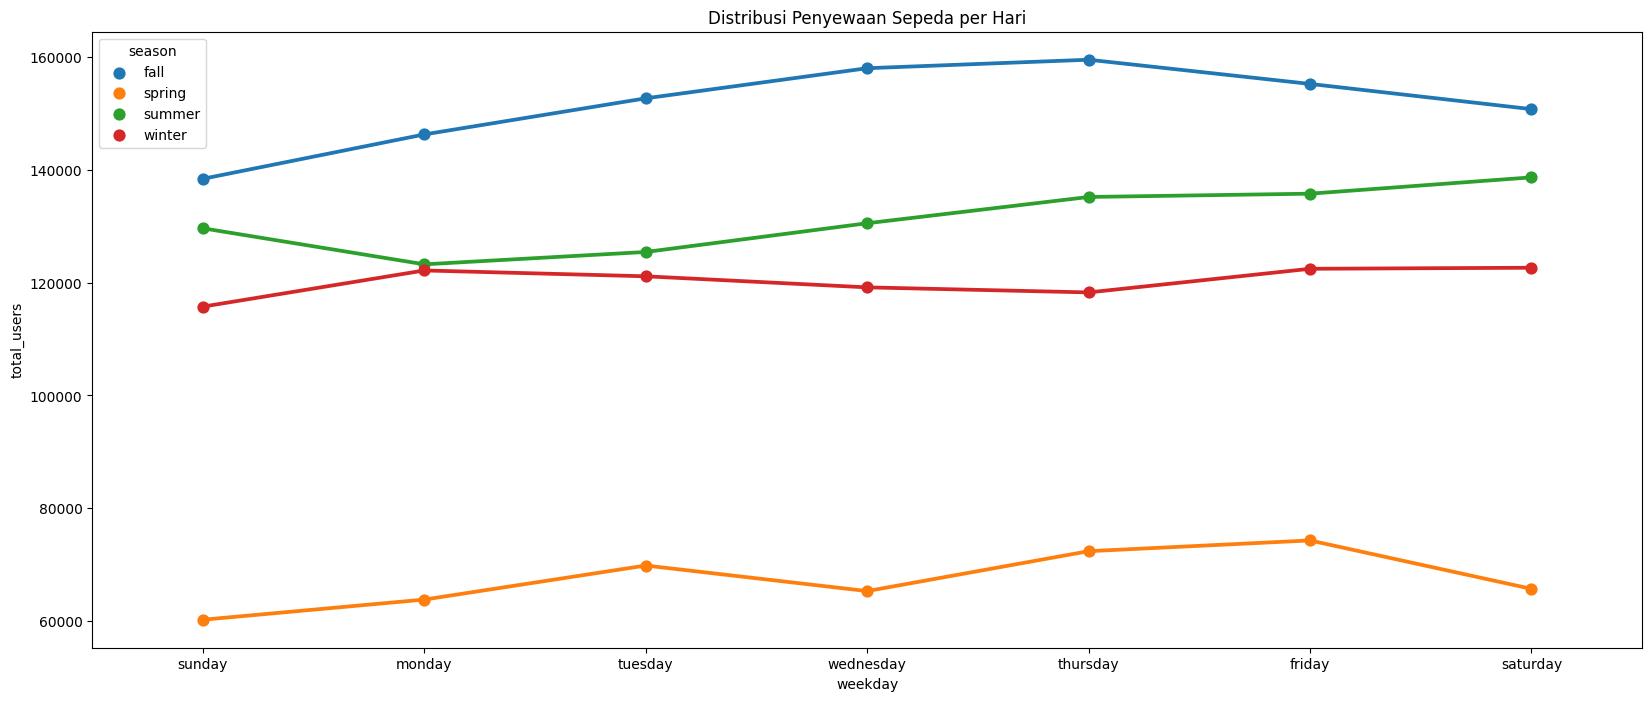

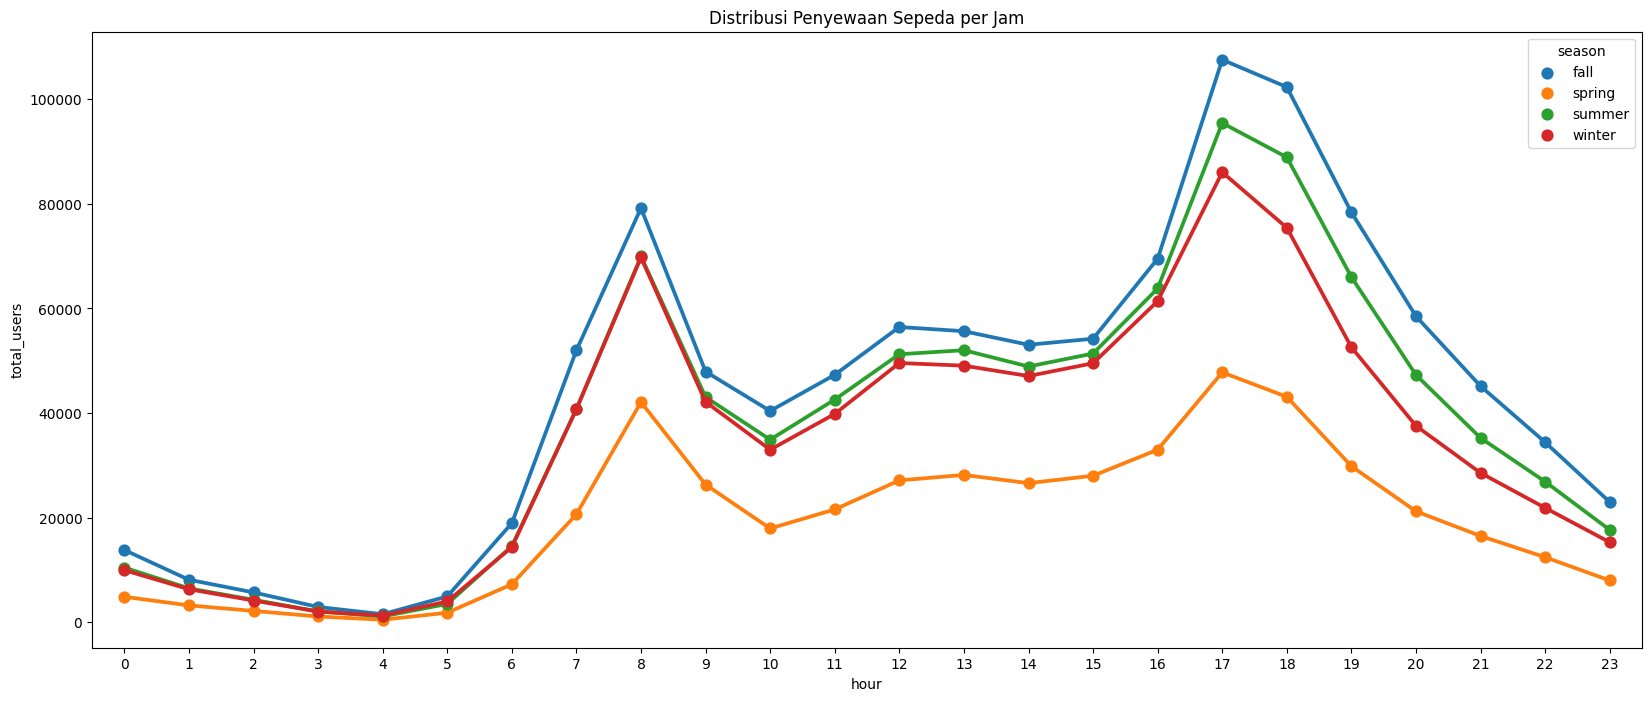

In [20]:
# Membuat Bar Chart distribusi penyewaan sepeda per musim dan bulan
fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(20,5))

sns.barplot(x="season", y="total_users",data=hour_df,
            estimator="sum", errorbar=None, ax=ax0)
ax0.set_title("Distribusi Penyewaan Sepeda per Musim")

sns.barplot(x="month", y="total_users",data=hour_df,
            estimator="sum", errorbar=None, ax=ax1)
ax1.set_title("Distribusi Penyewaan Sepeda per Bulan")
plt.show()

# Membuat Bar Chart perbandingan jumlah di hari tertentu
fig,(ax4, ax5) = plt.subplots(ncols=2,figsize=(20,5))

sns.barplot(x="is_holiday", y="total_users", data=hour_df,
            hue="season", estimator="sum", errorbar=None, ax=ax4)
ax4.set_title("is_holiday wise distribution of counts")
ax4.legend(loc="lower right")

sns.barplot(x="is_workingday", y="total_users", data=hour_df,
            hue="season", estimator="sum", errorbar=None, ax=ax5)
ax5.set_title("is_workingday wise distribution of counts")
ax5.legend(loc="lower right")
plt.show()

# Membuat Line Chart distribusi penyewaan sepeda per Hari berdasarkan musim
fig,ax2=plt.subplots(figsize=(20,8))

order = ["sunday", "monday", "tuesday", "wednesday",
         "thursday", "friday", "saturday"]
sns.pointplot(x="weekday", y="total_users", data=hour_df, order=order,
              estimator="sum", hue="season", errorbar=None, ax=ax2)
ax2.set_title("Distribusi Penyewaan Sepeda per Hari")
plt.show()

# Membuat Line Chart distribusi penyewaan sepeda per jam berdasarkan musim
fig,ax3=plt.subplots(figsize=(20,8))

sns.pointplot(x="hour", y="total_users", data=hour_df,
              estimator="sum", hue="season", errorbar=None, ax=ax3)
ax3.set_title("Distribusi Penyewaan Sepeda per Jam")
plt.show()

Berdasarkan hasil visualisasi di atas, ditemukan waktu optimum yang paling banyak dilakukan penyewaan sepeda, sebagai berikut:
- Musim, puncaknya di musim Fall (Gugur) & selanjutnya Summer (Panas)
- Bulan, berada di Mei - Oktober, dengan puncak di Agustus, dimana masih sejalan dengan jenis musim di bulan-bulan tersebut
- Jenis hari:
  - Hari Libur (Holiday) : lebih banyak secara dominan di non hari libur
  - Hari Kerja (Workingday) : lebih banyak di hari kerja
- Hari dalam seminggu pada tiap musimnya ditemukan pola yang relatif sama dimana ada kenaikan jumlah di hari kerja antara senin - jumat dengan puncak di hari kamis dan jumat
- Jam, ada 2 pola puncak jam optimum di tiap musimnya, umumnya dapat diinterpretasi sebagai jam sibuk:
  - Jam 16-19, paling optimum, dengan puncak di jam 17-18
  - Jam 7-9 dengan puncak di jam 8

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?

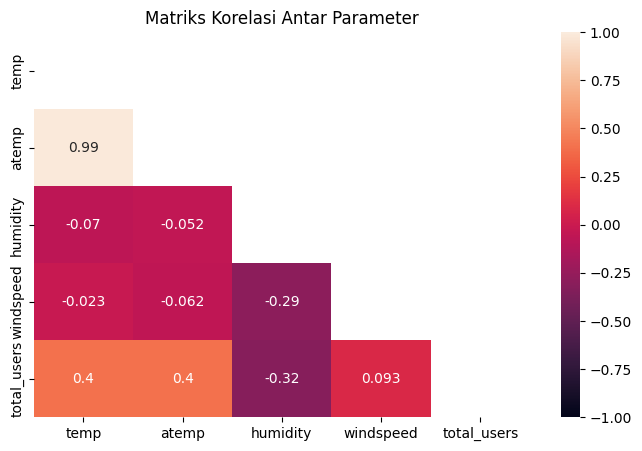

In [21]:
# Membuat dataframe visualisasi
correl_df=hour_df[["temp","atemp","humidity","windspeed","total_users"]]

# Membuat matriks Korelasi Parameter
fig,ax=plt.subplots(figsize=(8,5))

mask = np.triu(np.ones_like(correl_df.corr(), dtype=np.bool))
sns.heatmap(correl_df.corr(), mask=mask, annot=True,
            vmin=-1, vmax=1, ax=ax)
ax.set_title("Matriks Korelasi Antar Parameter")
plt.show()

Berdasarkan matriks korelasi di atas, pengaruh parameter cuaca terhadap jumlah penyewa sepeda sebagai berikut:
- Suhu (temp & atemp) berbanding lurus dan berkorelasi relatif rendah, dimana dengan suhu yang relatif lebih tinggi maka semakin banyak jumlah pelanggan
- Kelembapan (humidity) berbanding terbalik dan berkorelasi relatif rendah, dimana dengan kelembapan lebih rendah akan menambah jumlah pelanggan
- Kecepatan angin (windspeed) berbanding lurus dan berkorelasi sangat rendah, dimana angin yang relatif lebih cepat maka semakin banyak jumlah pelanggan

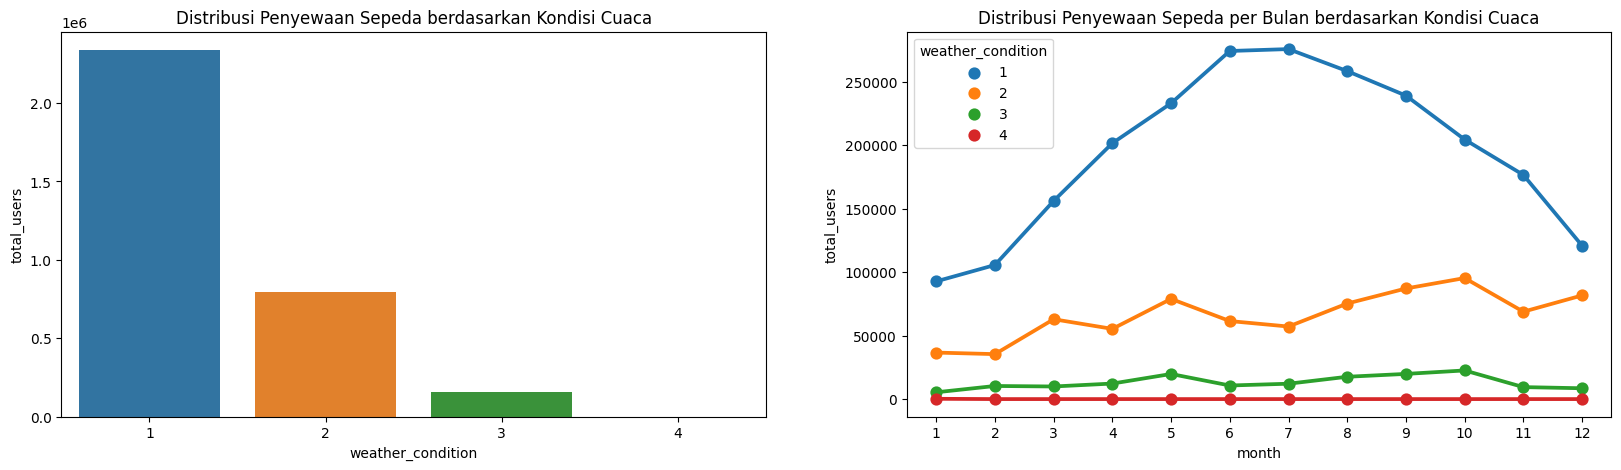

In [22]:
# Membuat Bar & Line Chart distribusi penyewaan sepeda berdasarkan Kondisi Cuaca
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(20,5))

sns.barplot(x="weather_condition", y="total_users", data=hour_df,
            estimator="sum", errorbar=None, ax=ax1)
ax1.set_title("Distribusi Penyewaan Sepeda berdasarkan Kondisi Cuaca")

sns.pointplot(x="month", y="total_users", data=hour_df,
              estimator="sum", hue="weather_condition", errorbar=None, ax=ax2)
ax2.set_title("Distribusi Penyewaan Sepeda per Bulan berdasarkan Kondisi Cuaca")
plt.show()

Berdasarkan hasil visualisasi di atas menunjukkan bahwa kondisi cuaca dengan kode 1, yaitu cuaca cerah dan sedikit berawan lebih digemari ditunjukkan dengan dominan jumlah penyewa sepeda.

## Conclusion

- Jenis pelanggan dengan jumlah sewa terbanyak, baik itu dilihat dari jumlah tahunan, musiman, dan bulanan adalah pelanggan yang sudah terdaftar memiliki membership dibandingkan pelanggan tidak tetap dan tidak memiliki membership

- Waktu paling banyak dilakukan penyewaan sepeda berada di musim (Gugur) & Summer (Panas) dengan puncak di bulan Agustus dan didominasi berada di hari kerja dan jam sibuk (prime time)

- Parameter cuaca cukup berpengaruh terutama pada suhu hangat, kelembapan lebih rendah serta kondisi cuaca relatif lebih cerah paling diminati pelanggan

- Berdasarkan hasil analisis pada notebook ini, ditemukan banyak pola dan kombinasi yang dapat dilakukan untuk memperoleh insight lebih dalam, tentunya diperlukan tambahan data pendukung lain, seperti data pelanggan untuk menganalisis perilaku pelanggan di waktu tertentu dan data lokasi penyewaan untuk analisis jumlah penyewa di lokasi tertentu.

In [23]:
# Penyimpanan file hasil data wrangling
hour_df.to_csv("a555_hour_data.csv", index=False)